# Comparison of Feature Extractors Using ASReview - Visualizations 

All of the visualizations were run using the ASReview library asreview-visualization (found in the [ASReview Github](https://github.com/asreview) and [ASReview ReadtheDocs](https://asreview.readthedocs.io/en/latest/extensions_overview.html) page, but look for version 0.19.3). The newer visualization library is ASReview Insights, found at: https://github.com/asreview/asreview-insights 

Visualizations were created for the top five models and bottom five models form the study. Additionally, there are some extra plots (mostly with the feature extractors sorted by classifier in order to compare their performance for each classifier). 

The main visualizations are recall plots and the RRF plots. Explanations for the metrics used can be found at: https://asreview.nl/blog/simulation-mode-class-101/. Explanations for the different plots can be found at: https://github.com/asreview/asreview-insights/blob/master/README.md

Install software and import libraries: 

In [1]:
%%capture
# install
!pip install asreview=="0.19.3"

In [2]:
%%capture
!pip install asreview-statistics asreview-visualization

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import asreview

In [4]:
import asreview
from asreview.models import *
from asreview.query_strategies import *
from asreview.balance_strategies import *
from asreview.feature_extraction import *

In [5]:
!asreview --version

0.19.3


# Plots of the simulation results: 

- Note: the "plots_list" object contains a list of the file path names. If working with Google Colab, a recommended method for running the code is uploading the state files (ending in ".h5") to the workspace and then copy the file path names into the "plots_list".

# Top Five Models:

- Based on WSS@95:

1) Tf-idf - Naive Bayes

2) Tf-idf - Logistic Regression

3) Tf-idf - SVM

4) Distilroberta - NN2

5) Allnaispecter - RF


Below are recall plots with RSS and WSS lines:

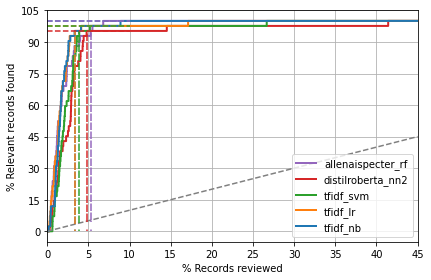

In [ ]:
# RECALL plot - top five models
from matplotlib.pyplot import legend
from asreviewcontrib.visualization.plot import Plot

with Plot.from_paths(plots_list_best) as plot: 
  #my_plot = plot.new(plot_type="inclusion", result_format="number") # labels top and side axes
  my_plot = plot.new(plot_type="inclusion")
  my_plot.ax.legend(['allenaispecter_rf','distilroberta_nn2', 'tfidf_svm','tfidf_lr','tfidf_nb'], loc="lower right")
  # plot settings
  my_plot.set_grid()
  my_plot.set_xlim(0, 45)
  #my_plot.set_ylim(0, 105)
  my_plot.add_random(add_text=False)
  for key in list(plot.analyses):
    if all_files or not plot.is_file[key]:
      my_plot.add_wss(key, 95, add_value=True, add_text=False) # change add_text to "True" to add a label
      my_plot.add_rrf(key, 10, add_value=True, add_text=False) # change add_text to "True" to add a label
  my_plot.show() 

# Bottom Five Models: 

- Based on WW@95: 

1) Robertabase - svm,

2) Robertabase - lr,

3) Robertabase - nn2,

4) Robertabase - rf,

5) All-mpnet-base-v2 - lr

Below are recall plots with RRF and WSS lines: 

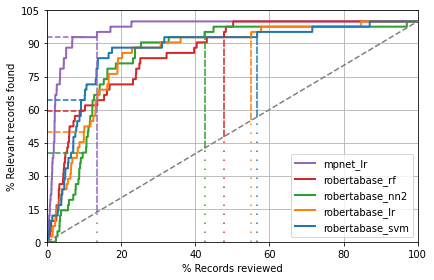

In [ ]:
# RECALL plot - bottom five models
from matplotlib.pyplot import legend
from asreviewcontrib.visualization.plot import Plot

plots_list_worst = ["/content/schoot_robertabase_svm2.h5", "/content/schoot_robertabase_lr2.h5", "/content/schoot_robertabase_nn2_2.h5",
              "/content/schoot_robertabase_rf2.h5", "/content/schoot_mpnet_lr_2.h5"]

with Plot.from_paths(plots_list_worst) as plot: 
  my_plot = plot.new(plot_type="inclusion") 
  my_plot.ax.legend(['mpnet_lr','robertabase_rf', 'robertabase_nn2','robertabase_lr','robertabase_svm'], loc="lower right") 

  # plot settings
  my_plot.set_grid()
  my_plot.set_xlim(0, 100)
  my_plot.set_ylim(0, 105)
  my_plot.add_random(add_text=False)
  for key in list(plot.analyses):
    if all_files or not plot.is_file[key]:
      my_plot.add_wss(key, 95, add_value=True, add_text=False) # change add_text to "True" to add a label
      my_plot.add_rrf(key, 10, add_value=True, add_text=False) # change add_text to "True" to add a label
  my_plot.show() 

## RRF Plots

These plots show how RRF values change when different proportions of the dataset are screened (for example: RRF@1, RRF@2, RRF@5, etc.). The RRF plots were created for the top five and bottom five models. The code includes extracting different RRF values from state files. 

In [ ]:
# top five models
plots_list_best = ["/content/schoot_tfidf_nb.h5", "/content/schoot_tfidf_lr.h5", "/content/schoot_tfidf_svm.h5",
              "/content/schoot_distilroberta_nn2.h5", "/content/schoot_allenaispecter_rf.h5"]

# bottom five models
plots_list_worst = ["/content/schoot_robertabase_svm2.h5", "/content/schoot_robertabase_lr2.h5", "/content/schoot_robertabase_nn2_2.h5",
              "/content/schoot_robertabase_rf2.h5", "/content/schoot_mpnet_lr_2.h5"]

Make analysis object in order to extract RRF values:

In [ ]:
as_analysis_obj = asreview.analysis.Analysis.from_path("/content/schoot_robertabase_nn2.h5") # example for one simulation run

# extract rrf values from @1 to @10 (increments of 1) - for a single model
rrf_list = []

for i in range(1,11):
  rrf_list.append(as_analysis_obj.rrf(i)[0])

print(rrf_list)
len(rrf_list)

In [ ]:
# make analysis object for top five models
plots_list_best = ["/content/schoot_tfidf_nb2.h5", "/content/schoot_tfidf_lr_2.h5", "/content/schoot_tfidf_svm_2.h5",
              "/content/schoot_distilroberta_nn2_2.h5", "/content/schoot_allenaispecter_rf_2.h5"]

analysis_obj_list = []
rrf_list_top = []
x_list = [1,2,5,10]

for mod in plots_list_best:
  as_analysis_obj = asreview.analysis.Analysis.from_path(mod)
  for i in x_list:
    rrf_list_top.append(as_analysis_obj.rrf(i)[0])

### RRF Plot for Top Five Models:

In [ ]:
# split list
split_1 = [rrf_list_top[0],rrf_list_top[4],rrf_list_top[8],rrf_list_top[12],rrf_list_top[16]]
split_2 = [rrf_list_top[1],rrf_list_top[5],rrf_list_top[9],rrf_list_top[13],rrf_list_top[17]]
split_5 = [rrf_list_top[2],rrf_list_top[6],rrf_list_top[10],rrf_list_top[14],rrf_list_top[18]]
split_10 = [rrf_list_top[3],rrf_list_top[7],rrf_list_top[11],rrf_list_top[15],rrf_list_top[19]]

In [ ]:
# make dataframe of rrf values
col_names = ['tfidf_nb','tfidf_lr', 'tfidf_svm','distilroberta_nn2','allenaispecter_rf']

d = {'Model': col_names, 'RRF@1': split_1, 'RRF@2': split_2, 'RRF@5': split_5, 'RRF@10': split_10}
rrf_top_df = pd.DataFrame(d)
rrf_top_df

,Model,RRF@1,RRF@2,RRF@5,RRF@10
0,tfidf_nb,21.428571,71.428571,97.619048,100.000000
1,tfidf_lr,33.333333,71.428571,97.619048,97.619048
2,tfidf_svm,16.666667,47.619048,95.238095,97.619048
3,distilroberta_nn2,19.047619,42.857143,95.238095,95.238095
4,allenaispecter_rf,33.333333,69.047619,92.857143,100.000000


In [ ]:
# turn df into latex table
print(rrf_top_df.to_latex(index=False))  

\begin{tabular}{lrrrr}
\toprule
            Model &     RRF@1 &     RRF@2 &     RRF@5 &     RRF@10 \\
\midrule
         tfidf\_nb & 21.428571 & 71.428571 & 97.619048 & 100.000000 \\
         tfidf\_lr & 33.333333 & 71.428571 & 97.619048 &  97.619048 \\
        tfidf\_svm & 16.666667 & 47.619048 & 95.238095 &  97.619048 \\
distilroberta\_nn2 & 19.047619 & 42.857143 & 95.238095 &  95.238095 \\
allenaispecter\_rf & 33.333333 & 69.047619 & 92.857143 & 100.000000 \\
\bottomrule
\end{tabular}



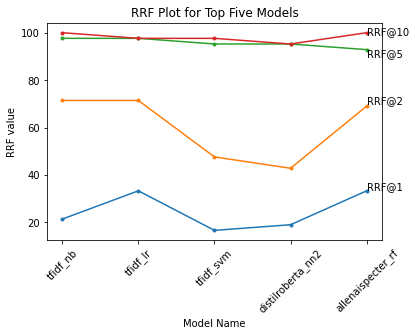

In [ ]:
# plot - top five
x_axis = ['tfidf_nb','tfidf_lr', 'tfidf_svm','distilroberta_nn2','allenaispecter_rf']

plt.plot(x_axis, rrf_top_df['RRF@1'], label = "RRF@1", marker=".")
plt.annotate('RRF@1', xy=('allenaispecter_rf', 34), xycoords='data')

plt.plot(x_axis, rrf_top_df['RRF@2'], label = "RRF@2", marker=".")
plt.annotate('RRF@2', xy=('allenaispecter_rf', 70), xycoords='data')

plt.plot(x_axis, rrf_top_df['RRF@5'], label = "RRF@5", marker=".")
plt.annotate('RRF@5', xy=('allenaispecter_rf', 90), xycoords='data')

plt.plot(x_axis, rrf_top_df['RRF@10'], label = "RRF@10", marker=".")
plt.annotate('RRF@10', xy=('allenaispecter_rf', 99), xycoords='data')

plt.title("RRF Plot for Top Five Models")
plt.xlabel("Model Name")
plt.ylabel("RRF value")
plt.xticks(rotation=45)
plt.show()

### RRF Plot for Bottom Five Models:

In [ ]:
# make analysis object for bottom five models
plots_list_worst = ["/content/schoot_robertabase_svm2.h5", "/content/schoot_robertabase_lr2.h5", "/content/schoot_robertabase_nn2_2.h5",
              "/content/schoot_robertabase_rf2.h5", "/content/schoot_mpnet_lr_2.h5"]

analysis_obj_list = []
rrf_list_bottom = []
# determine at which %'s the RRF value should be calculated
x_list = [1,2,5,10,20,50] 

for mod in plots_list_worst:
  as_analysis_obj = asreview.analysis.Analysis.from_path(mod)
  for i in x_list:
    rrf_list_bottom.append(as_analysis_obj.rrf(i)[0])


In [ ]:
# split list - to make it easier to visualize
split_1 = [rrf_list_bottom[0],rrf_list_bottom[6],rrf_list_bottom[12],rrf_list_bottom[18],rrf_list_bottom[24]]
split_2 = [rrf_list_bottom[1],rrf_list_bottom[7],rrf_list_bottom[13],rrf_list_bottom[19],rrf_list_bottom[25]]
split_5 = [rrf_list_bottom[2],rrf_list_bottom[8],rrf_list_bottom[14],rrf_list_bottom[20],rrf_list_bottom[26]]
split_10 = [rrf_list_bottom[3],rrf_list_bottom[9],rrf_list_bottom[15],rrf_list_bottom[21],rrf_list_bottom[27]]
split_20 = [rrf_list_bottom[4],rrf_list_bottom[10],rrf_list_bottom[16],rrf_list_bottom[22],rrf_list_bottom[28]]
split_50 = [rrf_list_bottom[5],rrf_list_bottom[11],rrf_list_bottom[17],rrf_list_bottom[23],rrf_list_bottom[29]]

In [ ]:
# alternative method for splitting the list
'''
i = 0 
split_list = []
split_1 = []
len_list = len(rrf_list_bottom)//len(x_list)
len_split_list = len(rrf_list_bottom)//len(x_list)

for i in range(0, len(rrf_list_bottom)):
  while (len_list == len(rrf_list_bottom)//len(x_list)) and (len_split_list <= len(rrf_list_bottom)//len(x_list)):
    split_1 = rrf_list_bottom[i:len(rrf_list_bottom):6]
    split_list.append(split_1)
    len_list = len(split_1)
    len_split_list = len(split_list)
    i += 1
    
split_list
'''

In [ ]:
# make dataframe of rrf values
col_names_bottom = ['robertabase_svm','robertabase_lr', 'robertabase_nn2','robertabase_rf','mpnet_lr'] 

d = {'Model': col_names_bottom, 'RRF@1': split_1, 'RRF@2': split_2, 'RRF@5': split_5, 'RRF@10': split_10,'RRF@20': split_20,'RRF@50': split_50}
rrf_bottom_df = pd.DataFrame(d)
rrf_bottom_df

,Model,RRF@1,RRF@2,RRF@5,RRF@10,RRF@20,RRF@50
0,robertabase_svm,9.523810,11.904762,33.333333,64.285714,88.095238,92.857143
1,robertabase_lr,2.380952,7.142857,23.809524,50.000000,83.333333,92.857143
2,robertabase_nn2,0.000000,0.000000,14.285714,40.476190,80.952381,97.619048
3,robertabase_rf,7.142857,9.523810,40.476190,59.523810,71.428571,97.619048
4,mpnet_lr,21.428571,54.761905,83.333333,92.857143,97.619048,100.000000


In [ ]:
# turn df into latex table
print(rrf_bottom_df.to_latex(index=False))  

\begin{tabular}{lrrrrrr}
\toprule
          Model &     RRF@1 &     RRF@2 &     RRF@5 &    RRF@10 &    RRF@20 &     RRF@50 \\
\midrule
robertabase\_svm &  9.523810 & 11.904762 & 33.333333 & 64.285714 & 88.095238 &  92.857143 \\
 robertabase\_lr &  2.380952 &  7.142857 & 23.809524 & 50.000000 & 83.333333 &  92.857143 \\
robertabase\_nn2 &  0.000000 &  0.000000 & 14.285714 & 40.476190 & 80.952381 &  97.619048 \\
 robertabase\_rf &  7.142857 &  9.523810 & 40.476190 & 59.523810 & 71.428571 &  97.619048 \\
       mpnet\_lr & 21.428571 & 54.761905 & 83.333333 & 92.857143 & 97.619048 & 100.000000 \\
\bottomrule
\end{tabular}



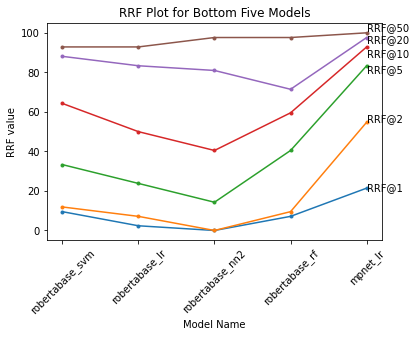

In [ ]:
# plot - bottom five
x_axis = ['robertabase_svm','robertabase_lr', 'robertabase_nn2','robertabase_rf','mpnet_lr'] # the models

plt.plot(x_axis, rrf_bottom_df['RRF@1'], label = "RRF@1", marker=".")
plt.annotate('RRF@1', xy=('mpnet_lr', 20), xycoords='data') # adds label

plt.plot(x_axis, rrf_bottom_df['RRF@2'], label = "RRF@2", marker=".")
plt.annotate('RRF@2', xy=('mpnet_lr', 55), xycoords='data')

plt.plot(x_axis, rrf_bottom_df['RRF@5'], label = "RRF@5", marker=".")
plt.annotate('RRF@5', xy=('mpnet_lr', 80), xycoords='data')

plt.plot(x_axis, rrf_bottom_df['RRF@10'], label = "RRF@10", marker=".")
plt.annotate('RRF@10', xy=('mpnet_lr', 88), xycoords='data')

plt.plot(x_axis, rrf_bottom_df['RRF@20'], label = "RRF@20", marker=".")
plt.annotate('RRF@20', xy=('mpnet_lr', 95), xycoords='data')

plt.plot(x_axis, rrf_bottom_df['RRF@50'], label = "RRF@50", marker=".")
plt.annotate('RRF@50', xy=('mpnet_lr', 101), xycoords='data')

plt.title("RRF Plot for Bottom Five Models")
plt.xlabel("Model Name")
plt.ylabel("RRF value")
plt.xticks(rotation=45)
plt.show()

### **Additional plots:**

Below are additional plots where the feature extractors have been sorted by the classifier they were run with. A recall plot was made for each classifier to see how well each feature extractor did for the same classifier (Naive Bayes was excluded because it can only be run with tf-idf): 

## 1) Logistic regression 

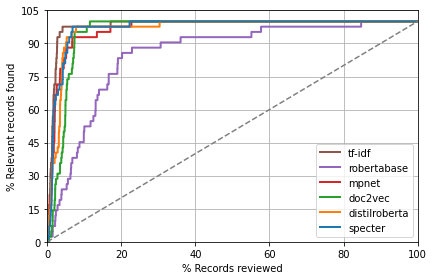

In [17]:
## RECALL plot
from matplotlib.pyplot import legend
from asreviewcontrib.visualization.plot import Plot

plots_list = ["/content/schoot_allenaispecter_lr.h5", "/content/schoot_distilroberta_lr.h5", "/content/schoot_doc2vec_lr.h5",
              "/content/schoot_mpnet_lr.h5", "/content/schoot_robertabase_lr.h5", "/content/schoot_tfidf_lr.h5"]

with Plot.from_paths(plots_list) as plot: 
  my_plot = plot.new(plot_type="inclusion") 
  my_plot.ax.legend(['tf-idf', 'robertabase', 'mpnet', 'doc2vec', 'distilroberta','specter'], loc="lower right")
  # plot settings
  my_plot.set_grid()
  my_plot.set_xlim(0, 100)
  my_plot.set_ylim(0, 105)
  my_plot.add_random(add_text=False)
  
  '''
  all_files = all(plot.is_file.values())
  for key in list(plot.analyses):
    if all_files or not plot.is_file[key]:
        my_plot.add_wss(
            key, 95, add_value=True, add_text=True)
        my_plot.add_rrf(
            key, 10, add_value=True, add_text=True)
  '''
  
  my_plot.show() 

## 2) Random Forest 

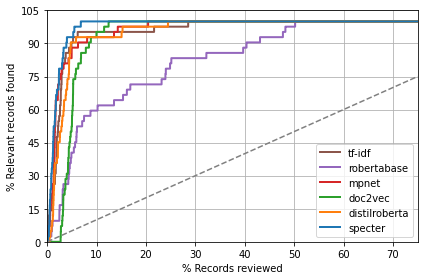

In [16]:
## RECALL plot
from matplotlib.pyplot import legend
from asreviewcontrib.visualization.plot import Plot

plots_list = ["/content/schoot_allenaispecter_rf.h5", "/content/schoot_distilroberta_rf.h5", "/content/schoot_doc2vec_rf.h5",
              "/content/schoot_mpnet_rf.h5", "/content/schoot_robertabase_rf.h5", "/content/schoot_tfidf_rf.h5"]

with Plot.from_paths(plots_list) as plot: 
  my_plot = plot.new(plot_type="inclusion") 
  my_plot.ax.legend(['tf-idf', 'robertabase', 'mpnet', 'doc2vec', 'distilroberta','specter'], loc="lower right")
  # plot settings
  my_plot.set_grid()
  my_plot.set_xlim(0, 75)
  my_plot.set_ylim(0, 105)
  my_plot.add_random(add_text=False)

  '''
  all_files = all(plot.is_file.values())
  for key in list(plot.analyses):
    if all_files or not plot.is_file[key]:
        my_plot.add_wss(key, 95, add_value=True, add_text=False)
        my_plot.add_rrf(key, 10, add_value=True, add_text=False)
  '''

  my_plot.show() 

## 3) SVM

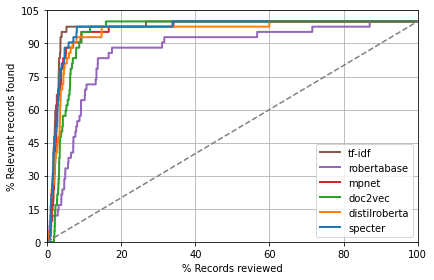

In [12]:
## RECALL plot
from matplotlib.pyplot import legend
from asreviewcontrib.visualization.plot import Plot

plots_list = ["/content/schoot_allenaispecter_svm.h5", "/content/schoot_distilroberta_svm.h5", "/content/schoot_doc2vec_svm.h5",
              "/content/schoot_mpnet_svm.h5", "/content/schoot_robertabase_svm.h5", "/content/schoot_tfidf_svm.h5"]

with Plot.from_paths(plots_list) as plot: 
  my_plot = plot.new(plot_type="inclusion") 
  my_plot.ax.legend(['tf-idf', 'robertabase', 'mpnet', 'doc2vec', 'distilroberta','specter'], loc="lower right")
  # plot settings
  my_plot.set_grid()
  my_plot.set_xlim(0, 100)
  my_plot.set_ylim(0, 105)
  my_plot.add_random(add_text=False)
  my_plot.show() 

## 4) NN2

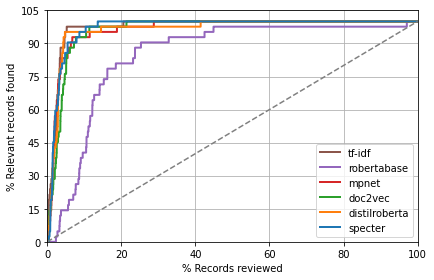

In [9]:
## RECALL plot
from matplotlib.pyplot import legend
from asreviewcontrib.visualization.plot import Plot

plots_list = ["/content/schoot_allenaispecter_nn2.h5", "/content/schoot_distilroberta_nn2.h5", "/content/schoot_doc2vec_nn2.h5",
              "/content/schoot_mpnet_nn2.h5", "/content/schoot_robertabase_nn2.h5", "/content/schoot_tfidf_nn2.h5"]

with Plot.from_paths(plots_list) as plot: 
  my_plot = plot.new(plot_type="inclusion") 
  my_plot.ax.legend(['tf-idf', 'robertabase', 'mpnet', 'doc2vec', 'distilroberta','specter'], loc="lower right")
  # plot settings
  my_plot.set_grid()
  my_plot.set_xlim(0, 100)
  my_plot.set_ylim(0, 105)
  my_plot.add_random(add_text=False)
  my_plot.show() 